In [132]:
pip install -U pip

Note: you may need to restart the kernel to use updated packages.


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
%pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### To familiarise with the data set

In [129]:
%pip install openpyxl
data = pd.read_excel('Weather AUS.xlsx')
data

Note: you may need to restart the kernel to use updated packages.


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


### Given these 24 features (column heads), I have been given the task to identify rainfall in a given day. There are three columns that mention about Rainfall:
1. Rainfall (quantity of rain)
2. Raintoday (boolean value)
3. Raintomorrow (boolean value)

### Hence the most pertinent feature out of these three would be the quantity of rainfall (Rainfall) because if we can identify that, then RainToday and RainTomorrow can by default be predicted.

### Therefore I take the dependent variable as "Rainfall"

#### To find the total null values for each column in absolute numbers and %

In [134]:
l = {}
for column in data.columns.values:
    l[column] = data[column].isnull().sum()

sorted_l = sorted(l.items(), key=lambda x:x[1], reverse = True)

b = []



for i in range(len(sorted_l)):
    b.append(sorted_l[i])   
    print(sorted_l[i], b[i][1]/len(data.axes[0]))

('Date', 0) 0.0
('Location', 0) 0.0
('MinTemp', 0) 0.0
('MaxTemp', 0) 0.0
('Rainfall', 0) 0.0
('Evaporation', 0) 0.0
('Sunshine', 0) 0.0
('WindGustDir', 0) 0.0
('WindGustSpeed', 0) 0.0
('WindDir9am', 0) 0.0
('WindDir3pm', 0) 0.0
('WindSpeed9am', 0) 0.0
('WindSpeed3pm', 0) 0.0
('Humidity9am', 0) 0.0
('Humidity3pm', 0) 0.0
('Pressure9am', 0) 0.0
('Pressure3pm', 0) 0.0
('Cloud9am', 0) 0.0
('Cloud3pm', 0) 0.0
('Temp9am', 0) 0.0
('Temp3pm', 0) 0.0
('RainToday', 0) 0.0
('RISK_MM', 0) 0.0
('RainTomorrow', 0) 0.0


### Since some of the feartures in the dataset such as Sunshine and Evaporation have close to 50% of the total row entries missing, so there are three possibilities that exist: 

1. Drop all entire columns containing the missing values - applicable when the feature(column) has a low causal influence on the dependent variable (rainfall)
2. Drop all rows containing the missing values and carry on with the remaining data - applicable when the No. of such eliminated rows is small to prevent info loss
3. Replace the missing values with some imputed value (mean, median, weighted sum etc.) - applicable when the feature(column) has a statistically significant causal
   influence but the rows to be dropped is also significantly high
   
However because the missing values for features such as Sunshine and Evaporation is almost 50%, so imputing some values might artificially skew our analysis, hence
a better alternative is to first establish a causal inference in the data set to figure out which features have a statistically significant influence post which 
decisions on dropping rows, imputing data or dropping columns can be made


# Let us first create a non-empty dataset

In [135]:
new_data = data

for i in new_data.columns.values:
    new_data.dropna(subset=[i], inplace=True)

#to check if indeed all the entries are non-zero and each column has the same number of entries

k = {}
for column in new_data.columns.values:
    k[column] = new_data[column].notnull().sum()

print("Total reduction in rows = : ", ((1 - new_data.axes[0].size/142193)*100))
print(k)

Total reduction in rows = :  60.32153481535659
{'Date': 56420, 'Location': 56420, 'MinTemp': 56420, 'MaxTemp': 56420, 'Rainfall': 56420, 'Evaporation': 56420, 'Sunshine': 56420, 'WindGustDir': 56420, 'WindGustSpeed': 56420, 'WindDir9am': 56420, 'WindDir3pm': 56420, 'WindSpeed9am': 56420, 'WindSpeed3pm': 56420, 'Humidity9am': 56420, 'Humidity3pm': 56420, 'Pressure9am': 56420, 'Pressure3pm': 56420, 'Cloud9am': 56420, 'Cloud3pm': 56420, 'Temp9am': 56420, 'Temp3pm': 56420, 'RainToday': 56420, 'RISK_MM': 56420, 'RainTomorrow': 56420}


In [136]:
new_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0.0,No
139109,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0.0,No
139110,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0.0,No
139111,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0.0,No


In [137]:
# to view the data types of all non-numeric features

for column in new_data.columns.values:
    #print(new_data[column].dtypes)
    if new_data[column].dtypes != int and new_data[column].dtypes != float:
        print(column, new_data[column].dtypes)

Date datetime64[ns]
Location object
WindGustDir object
WindDir9am object
WindDir3pm object
RainToday object
RainTomorrow object


# Data visualization and Outlier detection

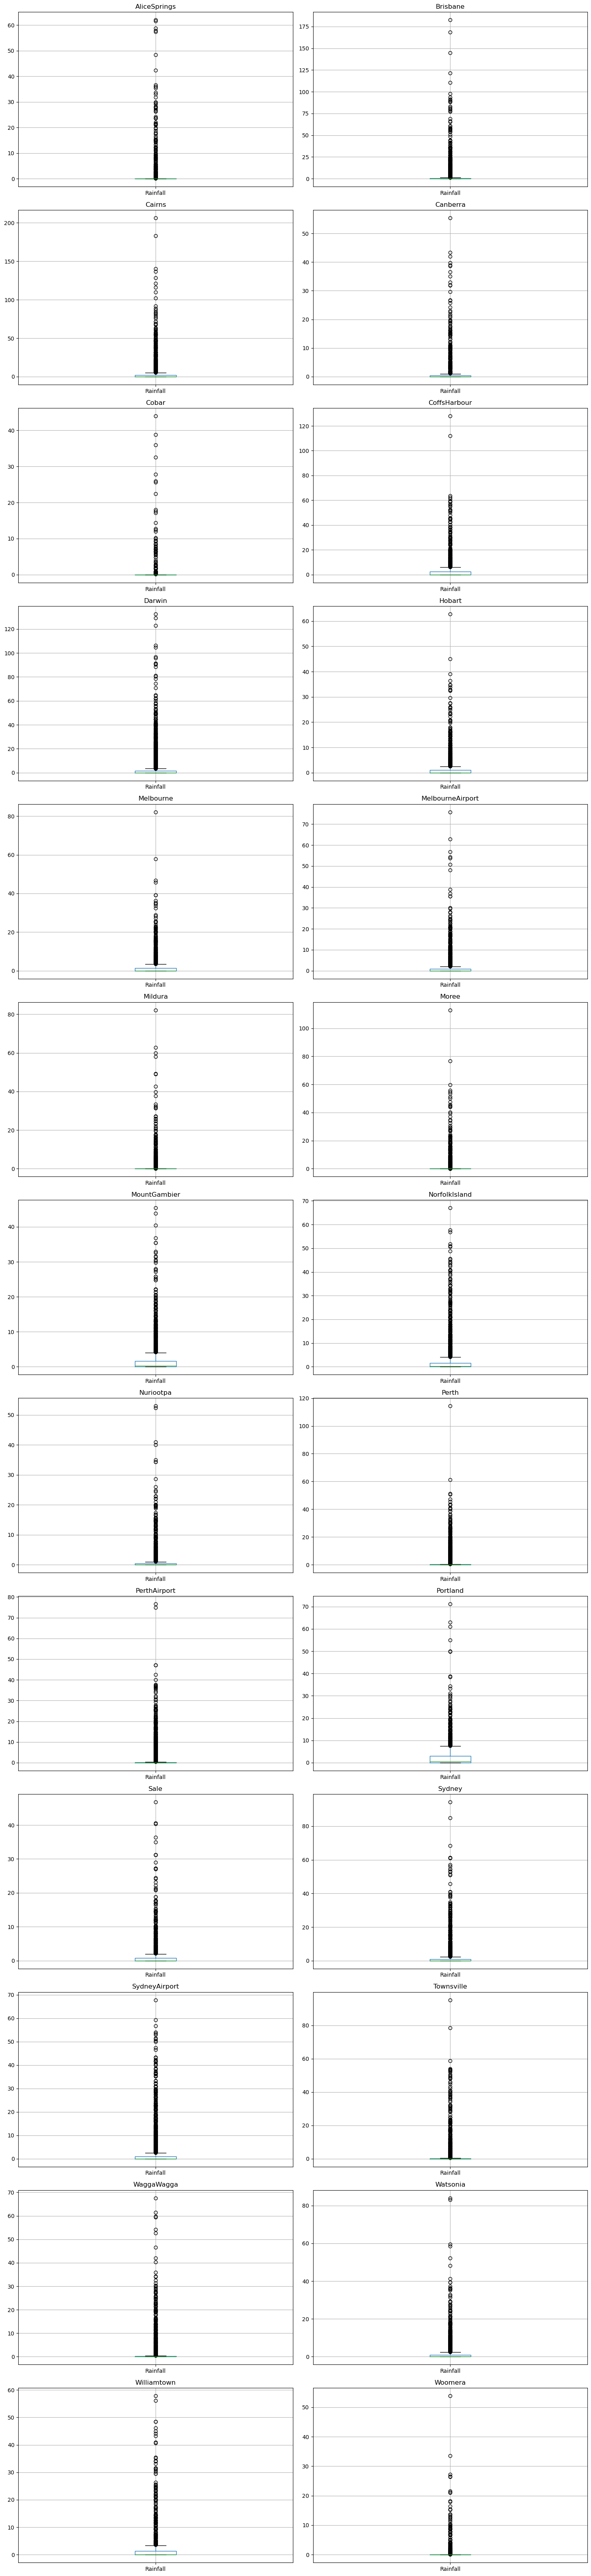

In [138]:
location = new_data.Location.unique()

fig, axes = plt.subplots(nrows=math.ceil(location.size / 2), 
                         ncols=2, 
                         figsize=(15, 5 * math.ceil(location.size / 2)))

idx = 0
for label, rainfall in new_data[['Location', 'Rainfall']].groupby('Location'):
    rainfall.boxplot(column='Rainfall',ax=axes[idx // 2, idx % 2]) #systematically does the row,column to place into subplots                       
    axes[idx // 2, idx % 2].set_title(label)
    
    idx += 1

plt.tight_layout()
plt.show()

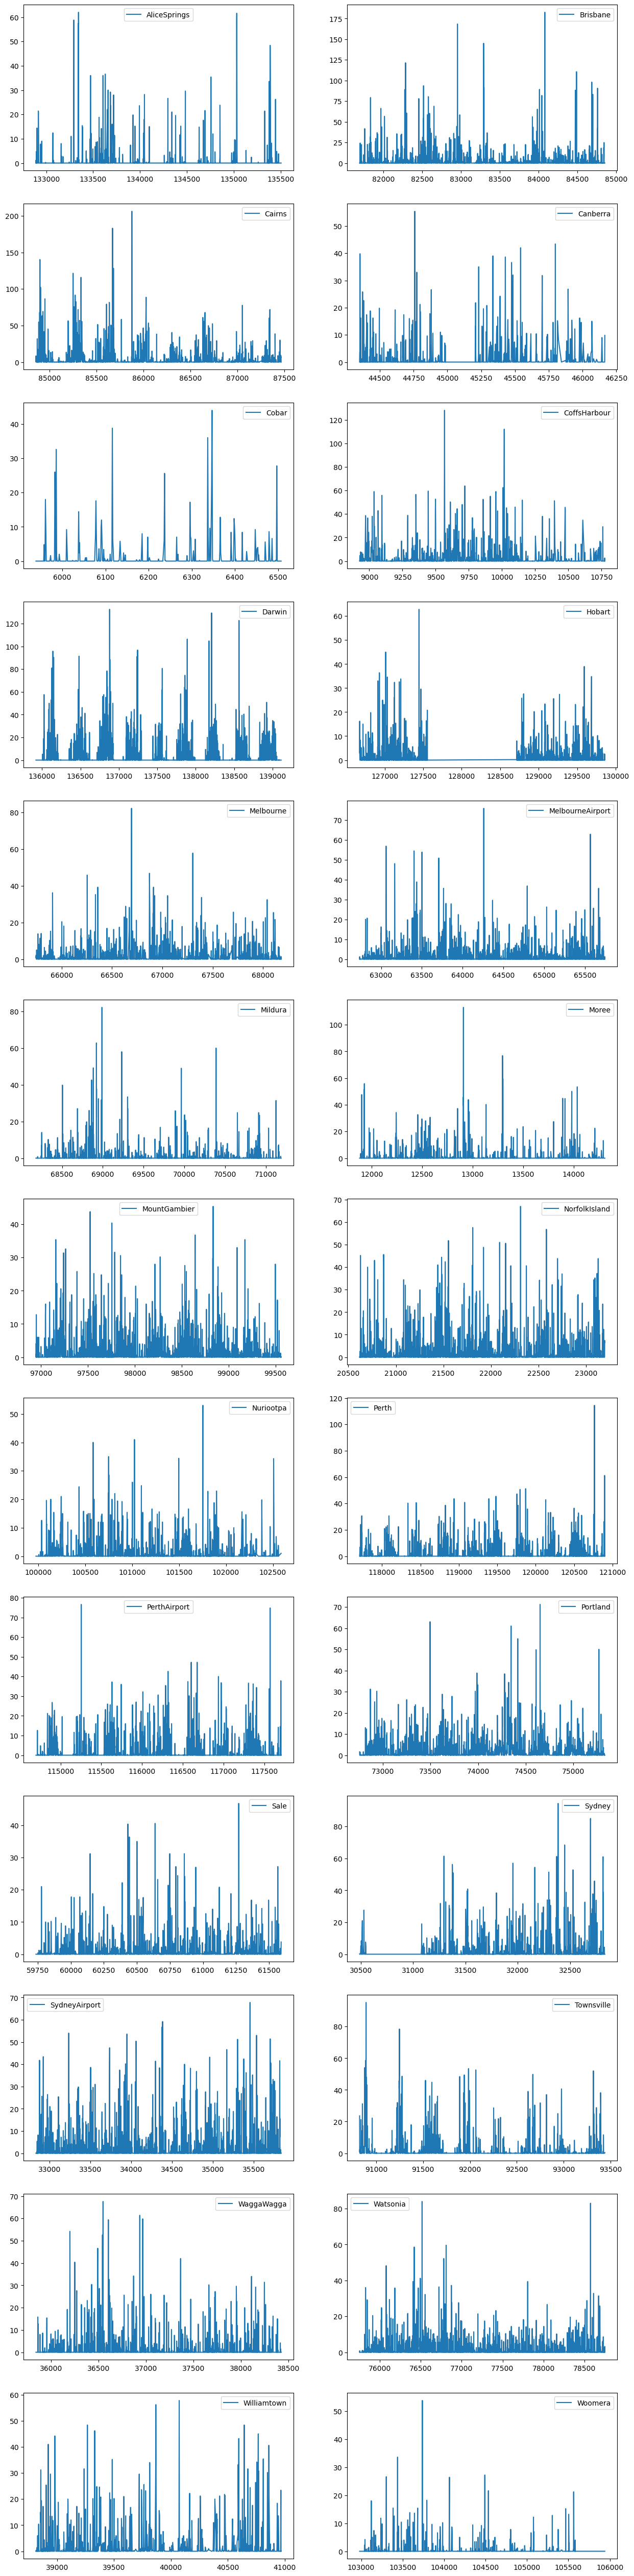

In [139]:
#Graph to see outliers
location = new_data.Location.unique()

fig, axes = plt.subplots(nrows=math.ceil(location.size / 2), 
                         ncols=2, 
                         figsize=(15, 5 * math.ceil(location.size / 2)))

idx = 0
for label, rainfall in new_data[['Location', 'Rainfall']].groupby('Location'):
    rainfall['Rainfall'].plot(ax=axes[idx // 2, idx % 2], #systematically does the row,column to place into subplots
                            label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

### Inference drawn from Outlier detection: 

Sydney Airport, Mount Gambier and Williamtown have the the highest volatility in Rainfall in the given 10 year period while Perth, Perthharbour, CoffsHarbour, Woomera and Moore have a stable rainfall pattern

### To convert the non-numeric (not float or integer) features in the data set into numeric values using Label Encoding method

In [140]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(new_data)

label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'datetime64[ns]':
        df[col] = label_encoder.fit_transform(df[col])
        
print(len(df.columns))

for column in df.columns.values:
    print(column, df[column].dtypes)

24
Date int64
Location int64
MinTemp float64
MaxTemp float64
Rainfall float64
Evaporation float64
Sunshine float64
WindGustDir int64
WindGustSpeed float64
WindDir9am int64
WindDir3pm int64
WindSpeed9am float64
WindSpeed3pm float64
Humidity9am float64
Humidity3pm float64
Pressure9am float64
Pressure3pm float64
Cloud9am float64
Cloud3pm float64
Temp9am float64
Temp3pm float64
RainToday int64
RISK_MM float64
RainTomorrow int64


# Exploratory Data analysis with a Correlation heat map

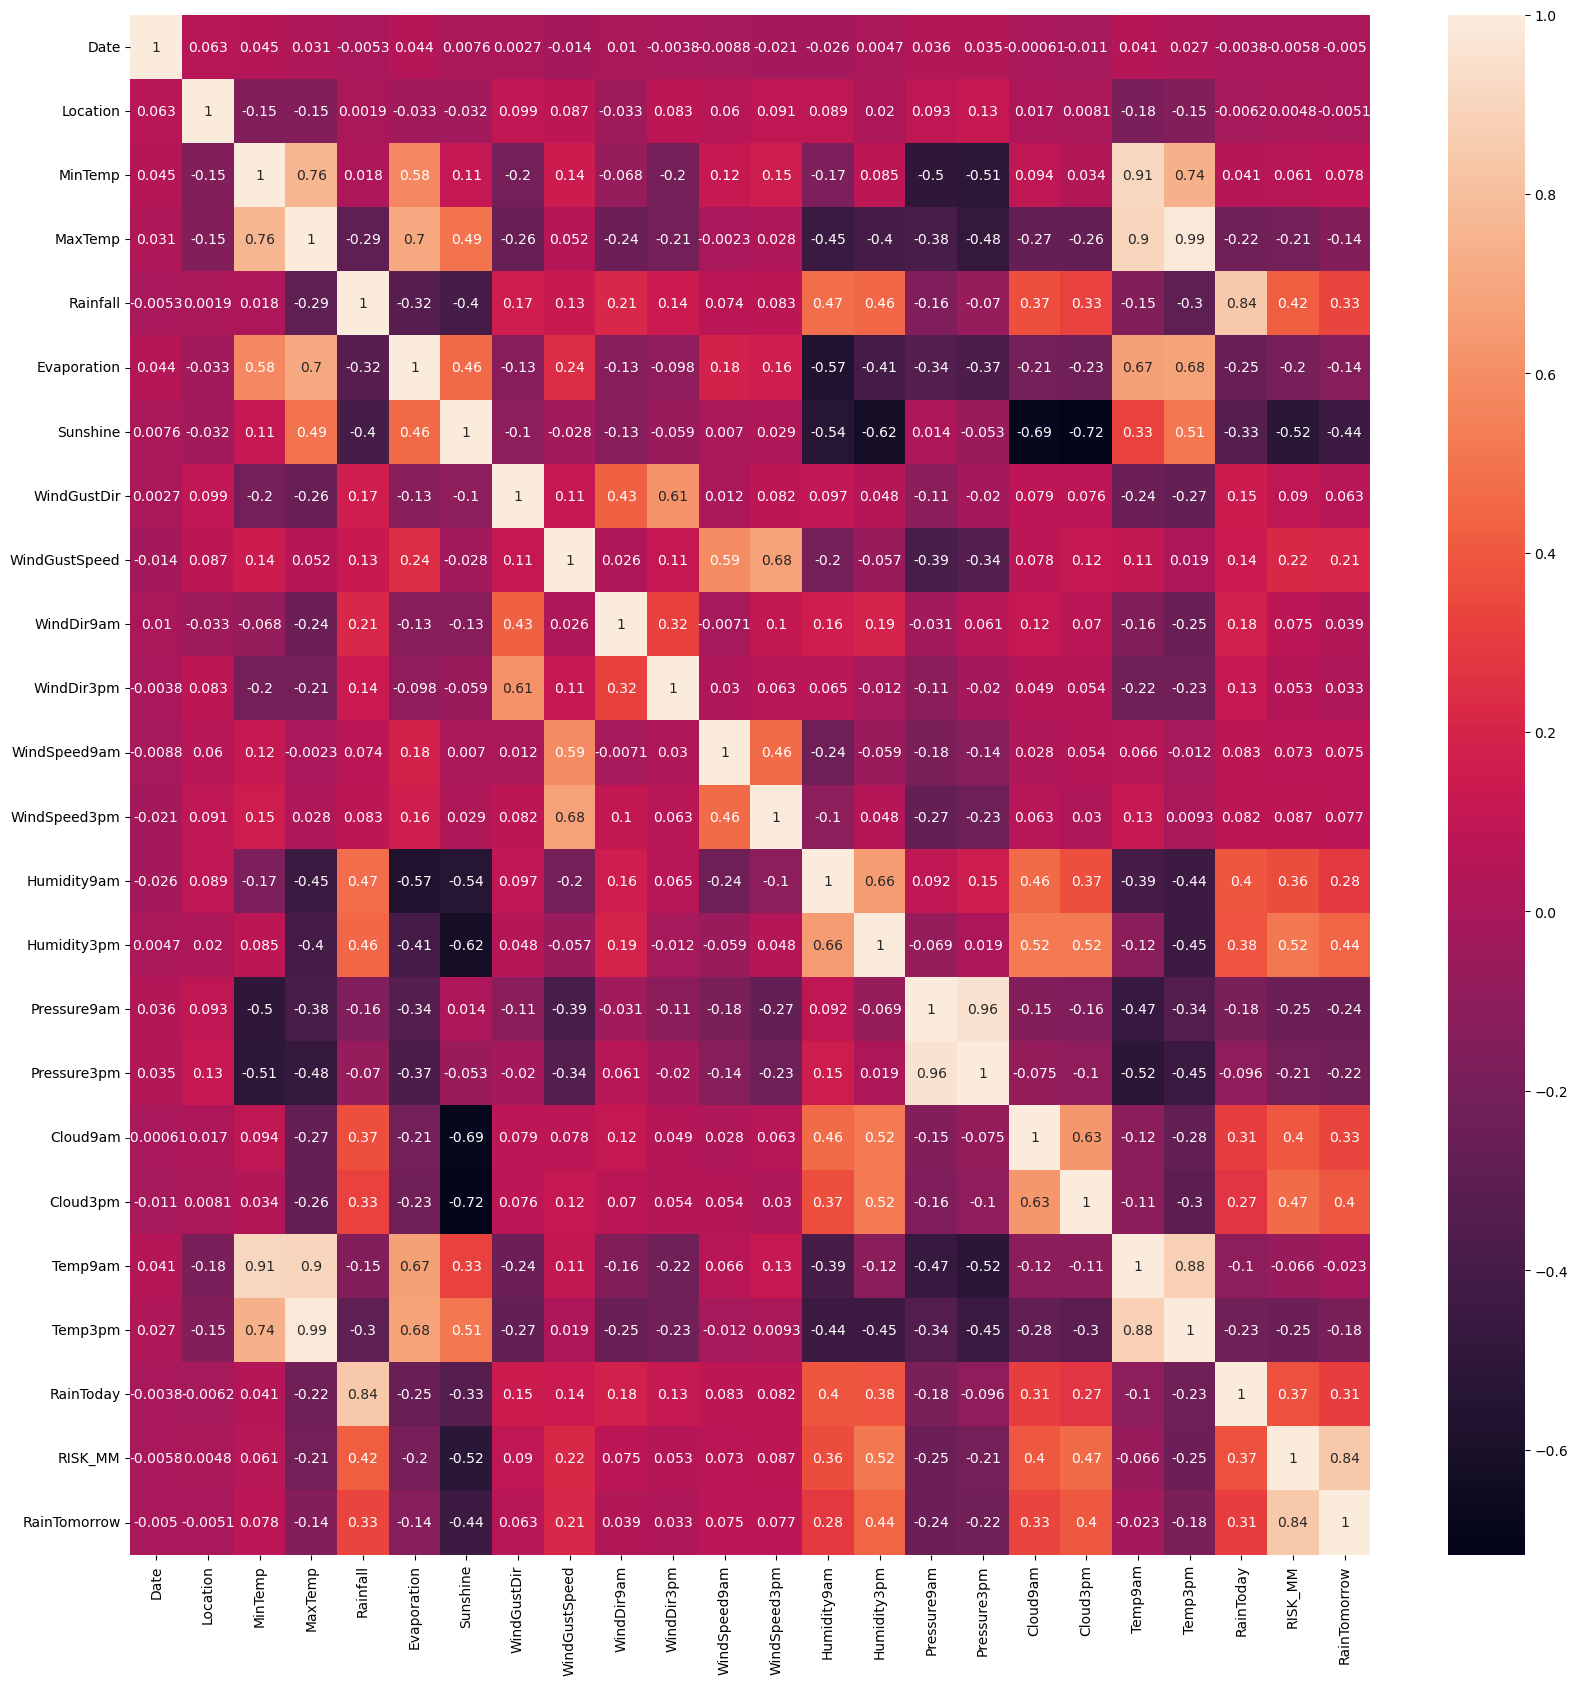

In [141]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

#### From the above Correlation results, we can infer that Rainfall has appreciable correlations with Evaporation (-32%), Sunshine ( -40%), Raintoday (84%), 
#### Risk MM (42%) and Rain Tomorrow (33%). However we are still not sure if all these features have a true cause - effect relationship on the "Rainfall" because
#### every feature can influence every other feature resulting in interaction effects and endogenity. 

### Therefore there is a need to explore the cause- effect relationship here to understand the extent to which a feature can affect "Rainfall"

In [142]:
# to insert dependent and independent variables dynamically in the subsequent causality test

x = []


for column in df.columns.values:
    x.append(column)


x.remove('Rainfall')


data_ols = {}

for column in x:
    y = []
    for value in x:
        y.append(value)
    y.remove(column)
    data_ols[column] = y   

# Causality test (this is my own independent research) : 

### The purpose of this test is to remove confounding characteristics in the data set and observe the individual causal effects of the independent variables on the dependent variable

In [143]:
import numpy as np
%pip install statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm

causal_power = {}

for column in data_ols:
    y2 = []
    y1 = []
    y1.append('Rainfall')
    y2.append(column)
    
    #First OLS
    
    formula1 = f"{'Rainfall'} ~ {' + '.join(data_ols[column])}"
    model1 = sm.OLS.from_formula(formula1, data= df)
    fitted_model1 = model1.fit()
    residual_values1 = fitted_model1.resid
    df1 = pd.DataFrame(residual_values1)
    #print(type(residual_values1))

    
    #Second OLS
    
    formula2 = f"{column} ~ {' + '.join(data_ols[column])}"
    model2 = sm.OLS.from_formula(formula2, data= df)
    fitted_model2 = model2.fit()
    residual_values2 = fitted_model2.resid
    df2 = pd.DataFrame(residual_values2)

    causal_power[column]= df1.corrwith(df2, axis = 0)

print(type(causal_power))
print(causal_power)

Note: you may need to restart the kernel to use updated packages.
<class 'dict'>
{'Date': 0   -0.007993
dtype: float64, 'Location': 0   -0.042008
dtype: float64, 'MinTemp': 0   -0.030937
dtype: float64, 'MaxTemp': 0   -0.030843
dtype: float64, 'Evaporation': 0    0.053651
dtype: float64, 'Sunshine': 0   -0.045132
dtype: float64, 'WindGustDir': 0   -0.004499
dtype: float64, 'WindGustSpeed': 0    0.018992
dtype: float64, 'WindDir9am': 0    0.014413
dtype: float64, 'WindDir3pm': 0    0.00684
dtype: float64, 'WindSpeed9am': 0    0.017145
dtype: float64, 'WindSpeed3pm': 0   -0.019871
dtype: float64, 'Humidity9am': 0    0.057135
dtype: float64, 'Humidity3pm': 0    0.025934
dtype: float64, 'Pressure9am': 0   -0.02725
dtype: float64, 'Pressure3pm': 0    0.017793
dtype: float64, 'Cloud9am': 0   -0.000832
dtype: float64, 'Cloud3pm': 0   -0.028649
dtype: float64, 'Temp9am': 0    0.008056
dtype: float64, 'Temp3pm': 0    0.047801
dtype: float64, 'RainToday': 0    0.447924
dtype: float64, 'RISK_MM':

## From the results of the causality, it can be validated that indeed features: "RainToday" and "RISK_MM" have a pronounced effect on Rainfall. 

However it must also be noted that the other features such as Evaporation (5.36%), Sunshine (-4.51%) and RainTomorrow (-1.93%) actually don't have a pronounced
effect on Rainfall as we apparently found in the Correlation heat map. It means the actual causal features (RainToday and RISK_MM ) were heavily influencing these
other features (Evaporation , Sunshine  and RainTomorrow - we can verify the same from the high correlation values in the heat map between the actual and 
apparent causal factors) which in turn led to these other features apparently showing a strong influence on Rainfall.

Hopefully now that we have actually identified the major causal factors in our analysis, our prediction models should exhibit the desired strength

After the causality test, I return back to my original data set where I found close to 50% of the entries were missing for certain columns
and I was facing a dilemma of whether to drop columns with missing data or impute some value in the missing fields or remove all the rows corresponding to empty
cells. Each of these three decisions would have certain degree of information loss or mutation which can generate erroneous results.
So let's re-evaluate our alternatives before we jump to the final prediction modelling

#### Alternative 1: We already did our causal research with the data set post removing rows, however that resulted in a "60% loss of data"

#### Alternative 2: If we impute values, it means we'll be adding artificial data such as in the form of mean, median, mode or within a range but that could  introduce heavy biases in the results since our artificial data would account for 60% of the total data which itself is a major source of bias
    
#### Alternative 3 : We drop those features which have the highest number of missing entries provided they aren't the major causal factors for "Rainfall" : Sunshine,Evaporation, Cloud3pm, Cloud9am followed by imputing values or removing rows containing non- empty cells, it would give us an approximate data loss of (1 - 20/24) * 100% = 16.67 % which is far less than the information loss in the above two cases. 

#### Alternative 4 : This would be Alternative 3 + studying the data distribution pattern of Sunshine followed by imputing random values from a within a range for the missing cells of Sunshine. This is because Sunshine has the 5th highest causal effect on Rainfall (although in a negative direction) : - 4.5 %, hence dropping Sunshine could result in some valuable information loss for a robust analysis

### My objective here is to make sure that I can do my analysis with the least information loss, hence I would go with either Alternative 3 or Alternative 4

However this requires further examination and time. Hence for the purpose of this assignment under the given time constraint, I am simply proceeding with the complete reduced data set that I just used for a complete exploratory analysis because although small in terms of data size, it has representation from all features of the study

# Visualizing Causal relationship

In [146]:
%%capture

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))

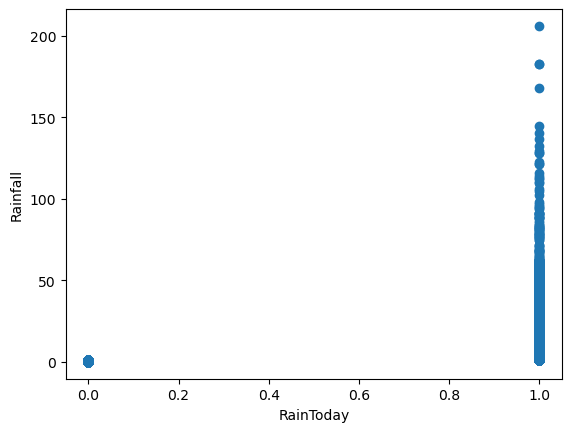

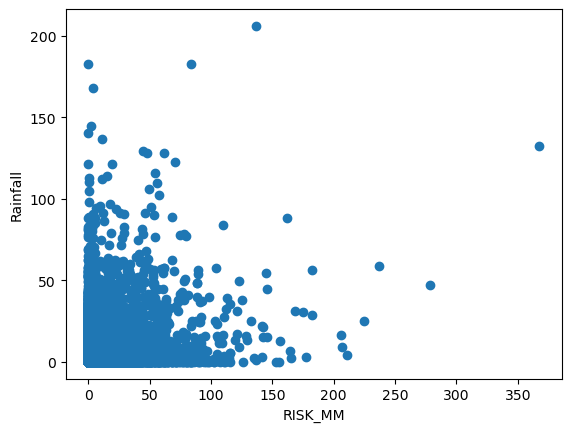

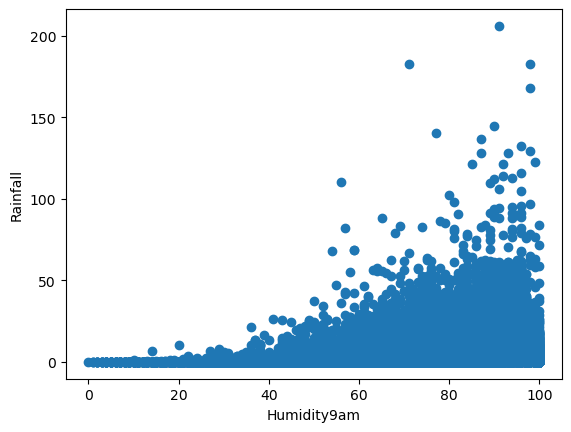

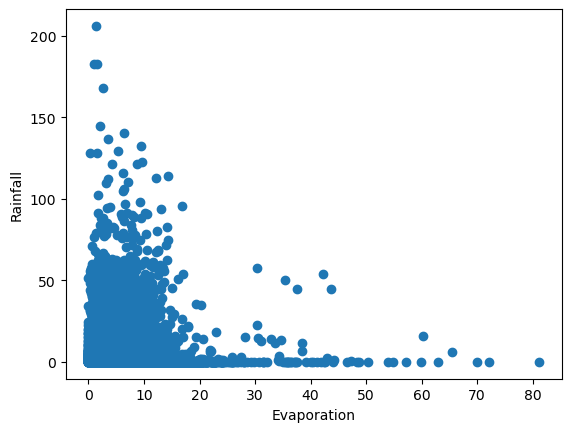

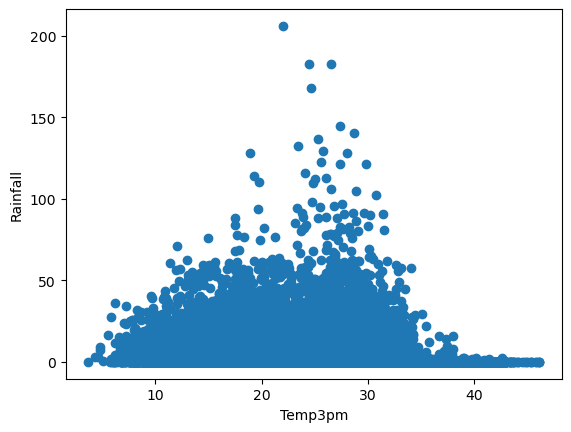

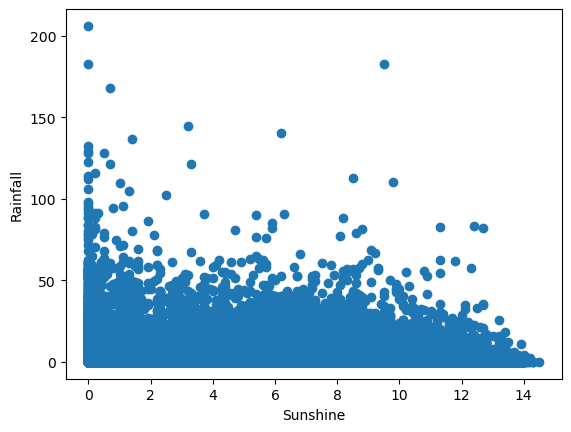

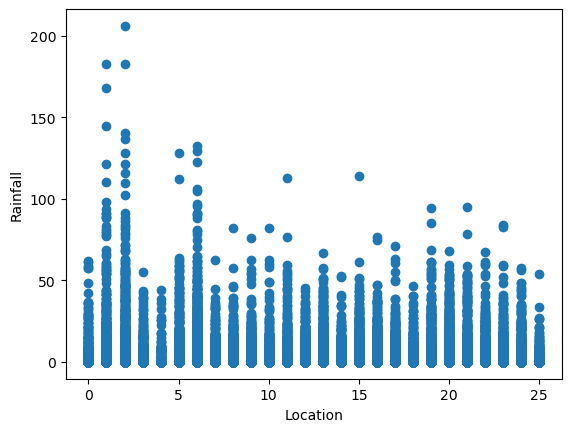

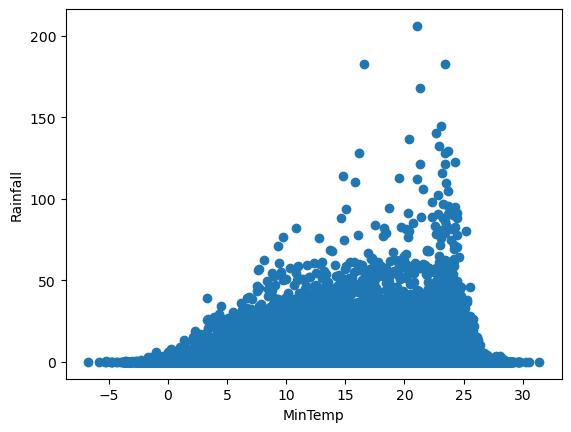

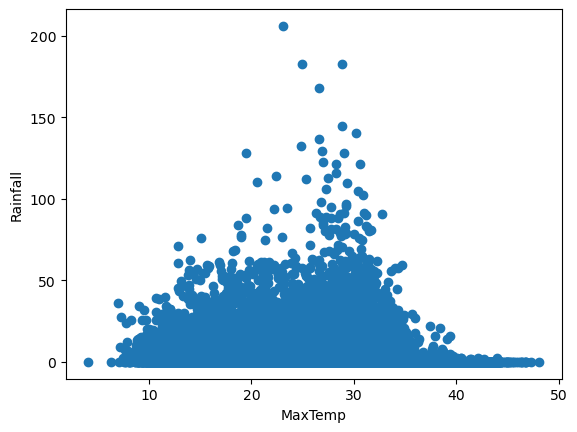

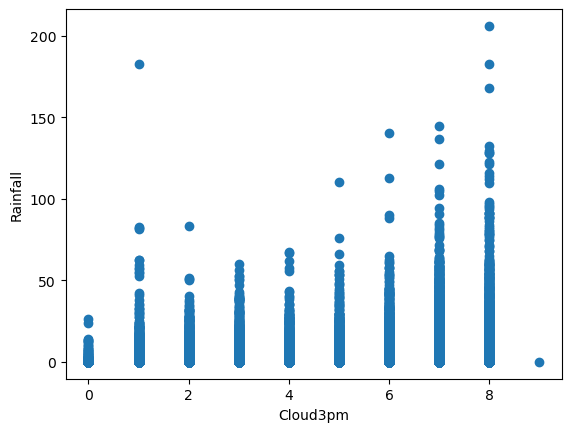

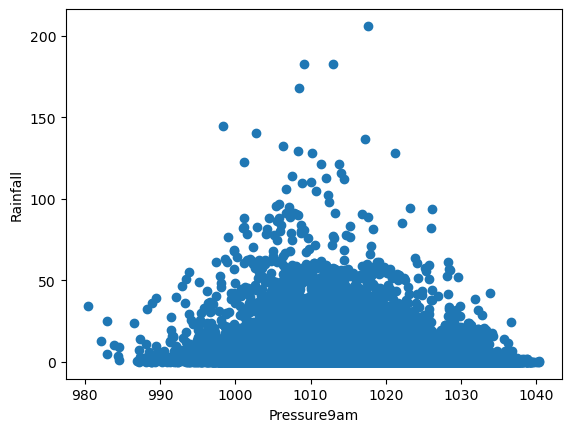

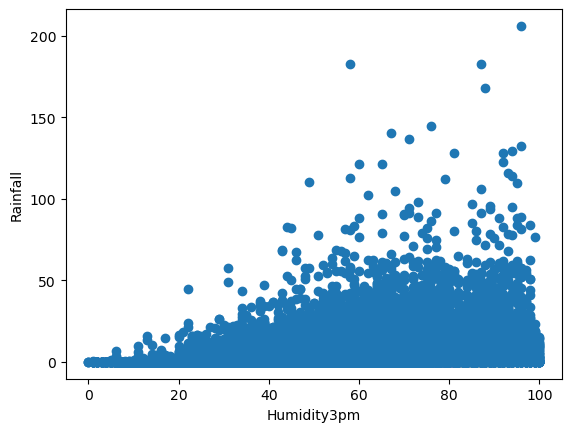

In [147]:
plt.scatter(df['RainToday'], df['Rainfall'])
plt.xlabel('RainToday')
plt.ylabel('Rainfall')
plt.show()

plt.scatter(df['RISK_MM'], df['Rainfall'])
plt.xlabel('RISK_MM')
plt.ylabel('Rainfall')
plt.show()

plt.scatter(df['Humidity9am'], df['Rainfall'])
plt.xlabel('Humidity9am')
plt.ylabel('Rainfall')
plt.show()

plt.scatter(df['Evaporation'], df['Rainfall'])
plt.xlabel('Evaporation')
plt.ylabel('Rainfall')
plt.show()

plt.scatter(df['Temp3pm'], df['Rainfall'])
plt.xlabel('Temp3pm')
plt.ylabel('Rainfall')
plt.show()

plt.scatter(df['Sunshine'], df['Rainfall'])
plt.xlabel('Sunshine')
plt.ylabel('Rainfall')
plt.show()

plt.scatter(df['Location'], df['Rainfall'])
plt.xlabel('Location')
plt.ylabel('Rainfall')
plt.show()

plt.scatter(df['MinTemp'], df['Rainfall'])
plt.xlabel('MinTemp')
plt.ylabel('Rainfall')
plt.show()

plt.scatter(df['MaxTemp'], df['Rainfall'])
plt.xlabel('MaxTemp')
plt.ylabel('Rainfall')
plt.show()

plt.scatter(df['Cloud3pm'], df['Rainfall'])
plt.xlabel('Cloud3pm')
plt.ylabel('Rainfall')
plt.show()

plt.scatter(df['Pressure9am'], df['Rainfall'])
plt.xlabel('Pressure9am')
plt.ylabel('Rainfall')
plt.show()


plt.scatter(df['Humidity3pm'], df['Rainfall'])
plt.xlabel('Humidity3pm')
plt.ylabel('Rainfall')
plt.show()


# Prediction

In [148]:
pip install -U pip

Note: you may need to restart the kernel to use updated packages.


In [149]:
%pip install prophet
#from prophet import Prophet
from prophet import Prophet
from matplotlib import pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [151]:
df1 = df.drop(columns='Rainfall', axis=1)
data3 = pd.DataFrame(df1, df['Rainfall'])
#print(data3.head)
X = df1
Y = df['Rainfall']

# OLS (Without grouping by RainToday and RISK_MM)

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1074.
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:38:10   Log-Likelihood:            -1.4253e+05
No. Observations:               45136   AIC:                         2.851e+05
Df Residuals:                   45112   BIC:                         2.853e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            40.4485      5.481      7.380

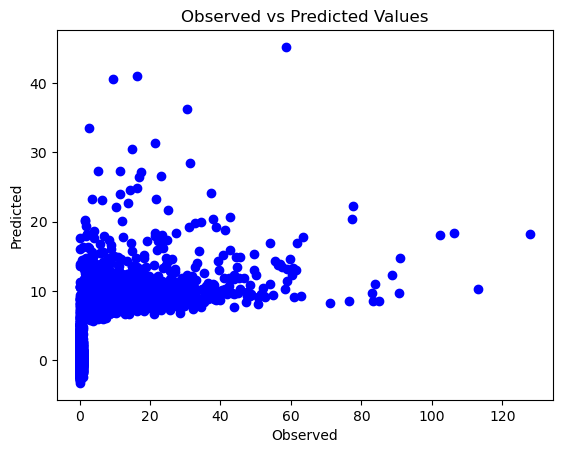

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_data.drop(columns = 'Rainfall')
y_train = train_data['Rainfall']

X_test = test_data.drop(columns = 'Rainfall')
y_test = test_data['Rainfall']

d = y_test

nw = df.drop(columns='Rainfall')

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

X_test = sm.add_constant(X_test)

predicted_test = model.predict(X_test)

print(model.summary())



# Extract true values and predicted values for evaluation
true_values = d
predicted_values = predicted_test

# Calculate evaluation metrics
mae = mean_absolute_error(true_values, predicted_values)
rmse = np.sqrt(mean_squared_error(true_values, predicted_values))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.scatter(y_test, predicted_test, color='blue')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Values')
plt.show()


In [188]:
fValues = predicted_test.mean(numeric_only = True)
 
print(fValues)

2.147599555372372


## Inference from OLS without grouping:

Date, WindGustDir, WindDir3pm, Cloud9am, Temp9am - these factors negligle effect on Rainfall (due to their low p-values in the OLS)

# Analysis using Facebook's Prophet Model(Seasonality and Trend analysis)

In [200]:

import pandas as pd

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# building the Prophet model

train_data['Date'] = pd.to_datetime(train_data['Date'])

train_data2 = pd.DataFrame()

train_data2 = train_data

train_data2 = train_data2.rename(columns={'Date': 'ds', 'Rainfall': 'y'})

print(train_data2)

m = Prophet()

# to add features other than Date to our model

regressor_list = []

for column in train_data2.columns.values:
    regressor_list.append(column)

regressor_list.remove('y')
regressor_list.remove('ds')
    
for feature in regressor_list:
    m.add_regressor(feature)
    

model = m.fit(train_data2)


# Testing the model

test_data['Date'] = pd.to_datetime(test_data['Date'])

test_data2 = pd.DataFrame()

test_data2 = test_data.drop(columns='Rainfall', axis=1)

test_data2 = test_data2.rename(columns={'Date': 'ds'})

future = test_data2

forecast = model.predict(future)

#forecast = model.predict(test_data)

#future = model.make_future_dataframe(periods=30)


                                  ds  Location  MinTemp  MaxTemp    y  \
137318 1970-01-01 00:00:00.000001620         6     18.4     29.9  0.0   
63048  1970-01-01 00:00:00.000000719         9     17.3     34.8  0.0   
73470  1970-01-01 00:00:00.000001122        17     11.1     17.6  1.6   
104298 1970-01-01 00:00:00.000001734        25     14.5     33.3  0.0   
85529  1970-01-01 00:00:00.000001050         2     24.0     30.2  0.2   
...                              ...       ...      ...      ...  ...   
116230 1970-01-01 00:00:00.000001939        16      8.3     19.3  9.6   
136953 1970-01-01 00:00:00.000001255         6     17.6     30.7  0.0   
98126  1970-01-01 00:00:00.000001556        12     10.3     18.2  0.2   
9301   1970-01-01 00:00:00.000000782         5     18.9     28.2  0.0   
60026  1970-01-01 00:00:00.000000697        18      5.3     17.8  0.0   

        Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  \
137318          7.0       9.4            9   

22:04:31 - cmdstanpy - INFO - Chain [1] start processing
22:04:34 - cmdstanpy - INFO - Chain [1] done processing


In [201]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Cloud3pm,Cloud3pm_lower,Cloud3pm_upper,Cloud9am,...,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00.000000002,0.053888,7.507710,22.379455,0.053888,0.053888,-0.268281,-0.268281,-0.268281,-0.038087,...,15.087795,15.087795,15.087795,15.087795,15.087795,15.087795,0.0,0.0,0.0,15.141684
1,1970-01-01 00:00:00.000000006,0.058228,-8.354859,6.152996,0.058228,0.058228,-0.167639,-0.167639,-0.167639,0.002426,...,-1.046028,-1.046028,-1.046028,-1.046028,-1.046028,-1.046028,0.0,0.0,0.0,-0.987799
2,1970-01-01 00:00:00.000000008,0.060399,-5.785557,8.870169,0.060399,0.060399,-0.268281,-0.268281,-0.268281,-0.027959,...,1.521974,1.521974,1.521974,1.521974,1.521974,1.521974,0.0,0.0,0.0,1.582372
3,1970-01-01 00:00:00.000000009,0.061484,1.335167,16.140717,0.061484,0.061484,0.335570,0.335570,0.335570,-0.027959,...,8.539402,8.539402,8.539402,8.539402,8.539402,8.539402,0.0,0.0,0.0,8.600886
4,1970-01-01 00:00:00.000000012,0.064739,-7.637443,7.318021,0.064739,0.064739,0.335570,0.335570,0.335570,0.042939,...,-0.161635,-0.161635,-0.161635,-0.161635,-0.161635,-0.161635,0.0,0.0,0.0,-0.096897


In [202]:
from prophet.plot import plot_plotly, plot_components_plotly

<Axes: xlabel='ds'>

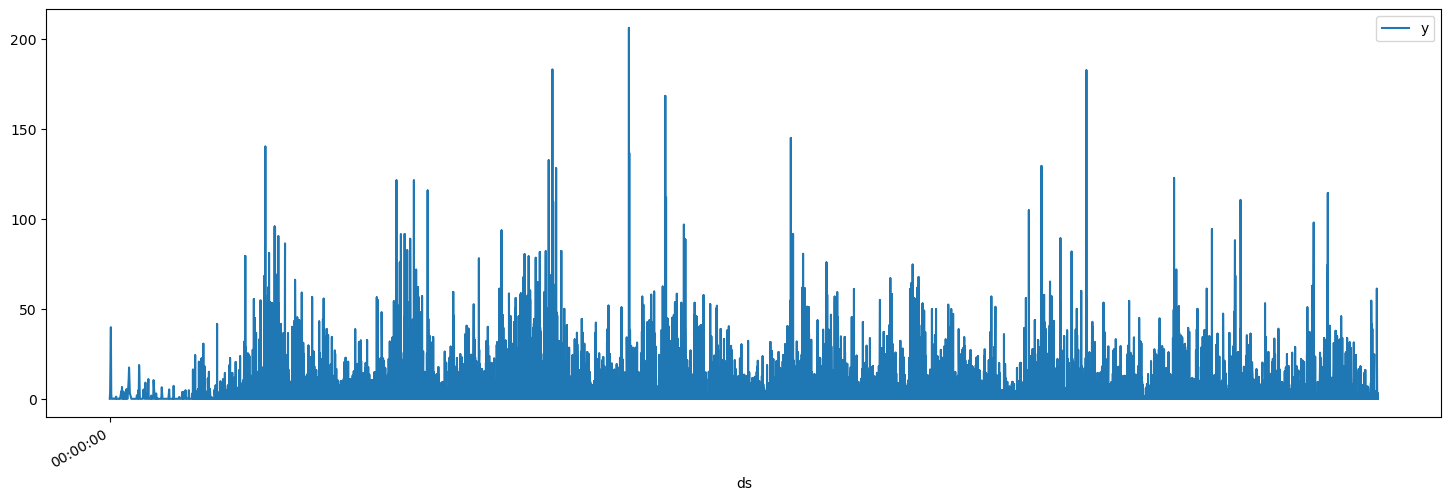

In [203]:
train_data2.plot(x='ds',y='y',figsize=(18,6))

/Users/rahulkumarmandal/anaconda3/envs/pentland/lib/python3.11/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/rahulkumarmandal/anaconda3/envs/pentland/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


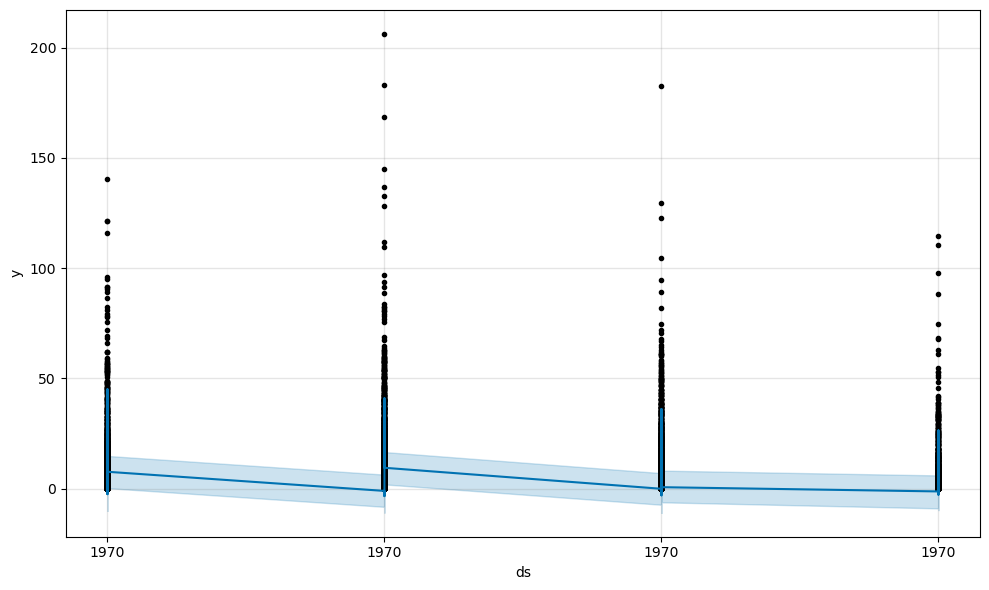

In [204]:
plot1 = model.plot(forecast)

/Users/rahulkumarmandal/anaconda3/envs/pentland/lib/python3.11/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


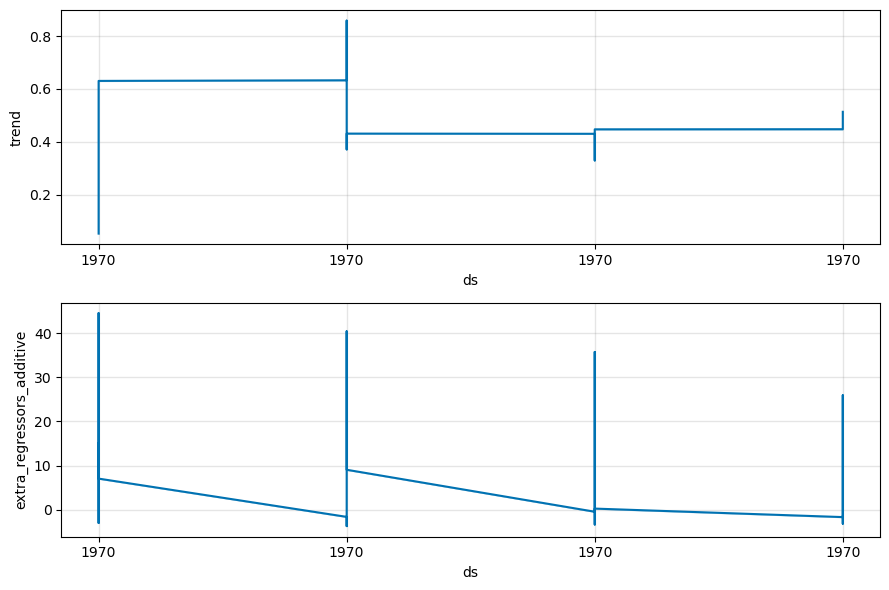

In [205]:
plt2 = model.plot_components(forecast)

In [206]:
from statsmodels.tools.eval_measures import rmse

In [207]:
predictions = forecast.iloc[:]['yhat']

In [208]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions, test_data['Rainfall']))
#print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  7.975364126118431


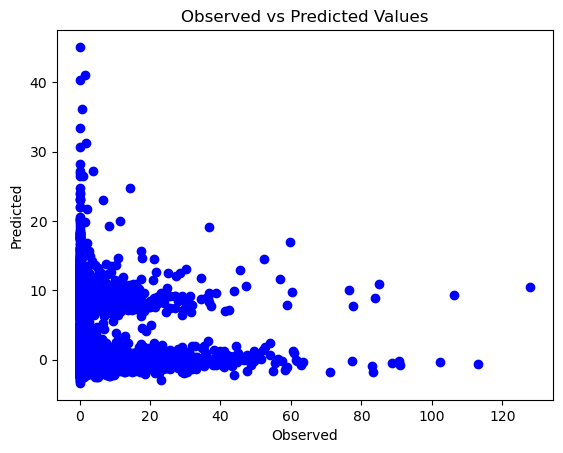

In [209]:
plt.scatter(test_data['Rainfall'], predictions, color='blue')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Values')
plt.show()

# Inference

Rainfall on an average is mainly constant across the entire region as we could see this both from the OLS and Facebook's Prophet model

In [192]:
"""

# Principal Component Analysis

import numpy as np
from sklearn.decomposition import PCA

transposed_df = df.transpose()
transposed_df = transposed_df.set_index(df.columns)


feature_names = transposed_df.columns

# Perform PCA
pca = PCA(n_components=12)  # Choose the number of components
principal_components = pca.fit_transform(transposed_df)

# Get the components (loadings)
components_df = pd.DataFrame(pca.components_, columns=feature_names)

print("Principal Component Loadings:")
print(components_df)

"""

Principal Component Loadings:
      5939      5940      5942      5943      5944      5945      5946    \
0   0.001997  0.002010  0.002004  0.002008  0.002006  0.002007  0.002013   
1  -0.007345 -0.007409 -0.007379 -0.007375 -0.007350 -0.007336 -0.007360   
2  -0.009712 -0.008769 -0.007029 -0.006816 -0.009909 -0.008390 -0.008156   
3  -0.001175 -0.002259 -0.000831 -0.007257 -0.004579 -0.002339 -0.002239   
4   0.003456 -0.000537  0.003018  0.003217  0.005844  0.005997  0.001872   
5  -0.001854 -0.002918  0.003012 -0.002629 -0.003934  0.000051 -0.000505   
6   0.002108  0.002127  0.000377  0.001091  0.000738  0.000855  0.000915   
7  -0.003535 -0.004917 -0.002630 -0.006009 -0.004744 -0.002885 -0.004671   
8  -0.008245  0.001077  0.006544 -0.006073 -0.001539 -0.005840 -0.001393   
9   0.004678 -0.002426 -0.003997  0.001643  0.000318  0.003745 -0.000948   
10 -0.001366  0.001428 -0.006325 -0.006828 -0.004630 -0.002010 -0.000927   
11 -0.002231  0.001351  0.001639  0.005007  0.008092 -0.00

In [170]:
#print(pca.components_)

[[ 0.00199676  0.00200966  0.00200392 ...  0.00659332  0.00658924
   0.00659087]
 [-0.00734538 -0.00740878 -0.00737881 ...  0.00668228  0.0066947
   0.0067072 ]
 [-0.00971225 -0.00876894 -0.00702874 ... -0.00532345  0.00042636
  -0.00139513]
 ...
 [ 0.00467779 -0.00242611 -0.00399673 ... -0.00175916 -0.00142725
  -0.00367499]
 [-0.00136605  0.00142835 -0.00632472 ... -0.00285058  0.00327681
  -0.00544165]
 [-0.00223139  0.00135115  0.0016394  ...  0.00326196  0.0001744
  -0.0018194 ]]


# Final inference drawn

### Factors Increases Rainfall

Humidity at 9 am, Cloud at 3 pm, Humidity at 3 pm

### Factors Decreasing Rainfall

Risk_MM, Evaporation, Sunshine

### Factors having no effect on Rainfall

Date, WindGustDir, WindDir3pm, Cloud9am, Temp9am

This means that Rainfall doesn't depend on the date and temperature. This result is in perfect harmony with our later analysis where we can clearly see that "Rainfall" doesn't exhibit any seasonality and trend

### Regions most witnessing fluctuations in Rainfall

Sydney Airport, Mount Gambier and Williamtown have the the highest volatility in Rainfall in the given 10 year period meaning these cities experience Rainfall without any regular pattern

### Regions least witnessing fluctuations in Rainfall

Perth, Perthharbour, CoffsHarbour, Woomera and Moore have a stable rainfall pattern

### Pros:

1. Since the Rainfall exhibits a more or less constant pattern, so the sales team of companies operating in these regions would have a better predictable demand pattern from Rainfall or in other words, 
   #### effect of "Rainfall" on Sales would be comfortably predictable

3. For the same reason mentioned above, the supply chain of any business would be less affected by Rainfall or in other words,
   #### effect of "Rainfall" on Supply chain or Inventory would be comfortably predictable

   
### Cons:

1. Since Rainfall doesn't show much of a trend or seasonality, businesses operating in this region won't be able to hedge its raw material input prices against
   random Rainfall incidents through financial derivatives

#### Opportunties:

When the Rainfall is too frequent as it is there for certain cities , organizations such as Retail and Sports wear could leverage this to create custom ad campaigns in line with the weather